In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))# drops 20% of the neurons to prevent overfitting
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2))) #reduces the size of the image by a factor of 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Converts the 2D matrix into a 1D vector
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)#training the model

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

2024-09-19 17:08:51.826390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        

/opt/anaconda3/envs/tesnorflow/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 120s 76ms/step - loss: 1.8684 - accuracy: 0.3076 - val_loss: 1.6080 - val_accuracy: 0.4287
Epoch 2/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4977 - accuracy: 0.4551 - val_loss: 1.4192 - val_accuracy: 0.4968
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.3704 - accuracy: 0.5046 - val_loss: 1.2960 - val_accuracy: 0.5370
Epoch 4/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.2942 - accuracy: 0.5339 - val_loss: 1.2103 - val_accuracy: 0.5704
Epoch 5/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.2362 - accuracy: 0.5526 - val_loss: 1.1911 - val_accuracy: 0.5724
Accuracy: 57.24%


In [11]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 23ms/step
Predicted labels: [3 1 8 0]
Actual labels:    [3 8 8 0]


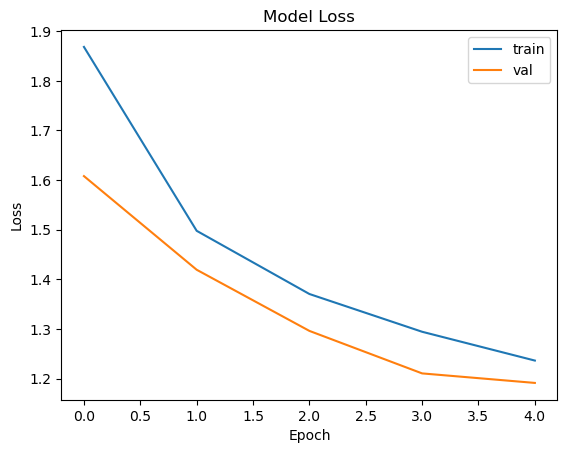

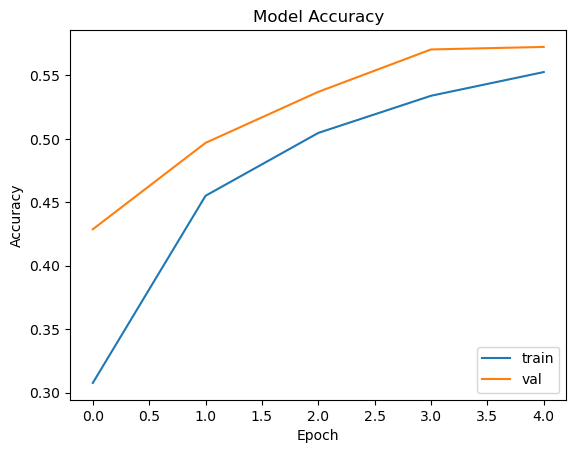

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()